#  $\color{red}{\text{MTE 408 ROBOTICS}}$

### Created By : Yousef Hegazi
### Date : August 2022


 
 


 #### In this script, we will find the forward kineamtics of two different robots configiration without using any  robotics toolbox :
     

> 1- **Articulated Arm (RRR)** <br>2- **Caretesian Robot (PPP)** <br>


The formula to calculate homogenous transformation from base to end effector can be written as for a robot with n frames :
 ### $T^0_n = T_1^0 * T_2^1 * T_3^2...T_n^{n-1}$




So we need to calculate homogenous transformation between each two frames, to do that we use :

### $T_n^{n-1} = R_z * R_n^{n-1} + t_n^{n-1}$

where :
    $T_n^{n-1}$ is homogenous transformation from frame n-1 to frame n<br>
    $R_z$ is joint rotation<br>
    $R_n^{n-1}$ is the rotation of frame n with respect to frame n-1<br>
    $t_n^{n-1}$ is translation vector between frames n and n-1 

### First we need to import necessery libraries :

In [53]:
import numpy as np #to deal with matrices
import sympy as sp  #to create symbols
import pandas as pd #to get better representation for matrices
from IPython.display import Image #to insert images 

#### $R_z$ will have the shape:<br>
$R_z = \begin{bmatrix} Cθ & -Sθ & 0 \\ Sθ& Cθ & 0 \\ 0 & 0 & 1 \end{bmatrix}$

and the function to calculate it is written below.

In [54]:
#Function to calculate joint Rotation Matrix 
def get_R_z(theta, joint_type) :
    """
    This function calculate the joint Rotation Matrix.
    ....
    it takes two arguments :
    ----------
    theta : (float) angle of rotation (in radians )
    joint_type : (string) prismatic, or revolute (takes values 'p' or 'r' )
    ----------
    ....
    
    Returns R_z
    """
    
    joint_type.lower()
    
    if joint_type == 'r' :
        R_z = np.array([[sp.cos(theta), -(sp.sin(theta)), 0],[sp.sin(theta), sp.cos(theta), 0], [0,0,1]])
        
    elif joint_type == ('p') :
        R_z = np.eye(3) #prismatic joint has no rotation
    else :
        valid = {'p', 'r'}
        raise ValueError("results: rotaion axis must be one of %r." % valid)

    return R_z

In [55]:
theta = sp.symbols("θ") #Creating theta symbol

(get_R_z((sp.pi/6),'r')) #example

array([[sqrt(3)/2, -1/2, 0],
       [1/2, sqrt(3)/2, 0],
       [0, 0, 1]], dtype=object)

#### Then we calculate $R_n^{n-1}$ which takes shape :
$\begin{bmatrix}  Cθ & -Sθ& 0 \\ Sθ & Cθ & 0 \\0 & 0 & 1 \end{bmatrix}\;\;\;\;\;\;\;\;$ __for rotation about x__<br><br>
$\begin{bmatrix}  Cθ & 0 & Sθ \\  0 & 1 & 0 \\-Sθ & 0 & Cθ \end{bmatrix}\;\;\;\;\;\;\;\;$ __for rotation about y__<br><br>
$\begin{bmatrix} Cθ & -Sθ & 0 \\ Sθ& Cθ & 0 \\ 0 & 0 & 1 \end{bmatrix}\;\;\;\;\;\;\;\;$ __for rotation about z__<br><br>

and the function to calculate it written below.

In [56]:
#Function to calculate frame rotation 
def get_R_frame(theta, rotaion_axis): 
    """
    This function calculate the rotation of the frame 
    ....
    it takes two arguments :
    ----------
    theta : (float) angle of rotation (in radians )
    rotaion_axis : (int) the axis which rotation happend about x, y or z (0, 1, -1)
    ----------
    ....
    
    Returns R_f
    """

    if rotaion_axis == 0:
        R_f = np.array([[1,0,0], [0,sp.cos(theta), -(sp.sin(theta))], [0,sp.sin(theta), sp.cos(theta)]])
        

    elif rotaion_axis == 1:
        R_f = np.array([[sp.cos(theta), 0, sp.sin(theta)], [0,1,0], [-(sp.sin(theta)), 0, sp.cos(theta)]])
        
    elif rotaion_axis == -1 :
        R_f = np.array([ [sp.cos(theta), -(sp.sin(theta)), 0], [sp.sin(theta), sp.cos(theta), 0], [0,0,1] ])
        
    else :
        valid = {0, 1, -1}
        raise ValueError("results: rotaion axis must be one of %r." % valid)
        
    
        
    return R_f

In [57]:
get_R_frame(theta,-1) #example

array([[cos(θ), -sin(θ), 0],
       [sin(θ), cos(θ), 0],
       [0, 0, 1]], dtype=object)

#### Then we calculate translation vector between frames  :
$t_n^{n-1}$ = $\begin{bmatrix} distance \;\;in\;\; x \\ distance \;\;in\;\; y \\ distance \;\;in\;\; z\end{bmatrix}$
<br><br>
we can calculate it with function below :


In [58]:
def get_t(x_d, y_d, z_d) :
    """
    This function calculate the rotation of the frame 
    ....
    it takes three arguments :
    ----------
    x_d = (float) distance between old frame and new frame on x-axis
    y_d = (folat) distance between old frame and new frame on y-axis
    z_d = (float) distance between old frame and new frame on z-axis
    ----------
    ....
    Returns t
    """
    
    t = np.array([[x_d, y_d, z_d]])
    return np.transpose(t) #To get vertical vector

In [59]:
a = sp.symbols('a')
get_t(a*sp.cos(theta), 0, 0) #example

array([[a*cos(θ)],
       [0],
       [0]], dtype=object)

### Now we calculate $T_n^{n-1}$ between each two frames which will be 4\*4 matrix 

In [60]:
def get_T(R_z, R_f, t_vector):
    
    """
    This function calculate homogenous transformation between two frames
    ....
    it takes three arguments :
    ----------
    R_f = (numpy array) rotation of the frame matrix.
    R_z = (numpy array) joint Rotation Matrix.
    t_vector = (numpy array) distance between old frame and new frame on z-axis
    ----------
    .... 
    Returns T
    """
    R_c = np.dot(R_z, R_f)
    T = np.concatenate((R_c, t_vector), axis = 1)
    T = np.concatenate((T,np.array([[0,0,0,1]]))) #scaling to get square matrix
    return T 


In [61]:
#################
R_z = get_R_z (theta, 'r')
R_f = get_R_frame(theta, -1) #example1
t = get_t(a, 0, 0)
T1 = get_T(R_z, R_f, t)
#################
R_z = get_R_z (theta, 'r')
R_f = get_R_frame(theta, -1) #example2
t = get_t(a, 0, a+1)
T3 = get_T(R_z, R_f, t)
#################
R_z = get_R_z (theta, 'p')
R_f = get_R_frame(theta, -1) #example3
t = get_t(a, 0, 0)
T2 = get_T(R_z, R_f, t)
#################

### Finally we calculate $T_n^0$ 

In [62]:
def get_T_total(*T):
    """
    This function calculate the joint Rotation Matrix.
    ....
    it takes one arbitary argument :
    ----------
    T : (numpy array) homogenous transformation between two frames
    ----------
    ....
    Returns T_tot
    """
    T_tot = T[0]
    for i in range(len(T)):
        next_frame = T[i+1]
        T_tot = np.dot(T_tot, next_frame)
        if i+2 == len(T):
            break
    return T_tot

In [63]:
get_T_total(T1, T2, T3) #example

array([[2*(-1.0*(-sin(θ)**2 + cos(θ)**2)*sin(θ) - 2.0*sin(θ)*cos(θ)**2)*sin(θ)*cos(θ) + (1.0*(-sin(θ)**2 + cos(θ)**2)*cos(θ) - 2.0*sin(θ)**2*cos(θ))*(-sin(θ)**2 + cos(θ)**2),
        (-1.0*(-sin(θ)**2 + cos(θ)**2)*sin(θ) - 2.0*sin(θ)*cos(θ)**2)*(-sin(θ)**2 + cos(θ)**2) - 2*(1.0*(-sin(θ)**2 + cos(θ)**2)*cos(θ) - 2.0*sin(θ)**2*cos(θ))*sin(θ)*cos(θ),
        0,
        a*(1.0*(-sin(θ)**2 + cos(θ)**2)*cos(θ) - 2.0*sin(θ)**2*cos(θ)) + a*(-sin(θ)**2 + cos(θ)**2) + a],
       [(1.0*(-sin(θ)**2 + cos(θ)**2)*sin(θ) + 2.0*sin(θ)*cos(θ)**2)*(-sin(θ)**2 + cos(θ)**2) + 2*(1.0*(-sin(θ)**2 + cos(θ)**2)*cos(θ) - 2.0*sin(θ)**2*cos(θ))*sin(θ)*cos(θ),
        -2*(1.0*(-sin(θ)**2 + cos(θ)**2)*sin(θ) + 2.0*sin(θ)*cos(θ)**2)*sin(θ)*cos(θ) + (1.0*(-sin(θ)**2 + cos(θ)**2)*cos(θ) - 2.0*sin(θ)**2*cos(θ))*(-sin(θ)**2 + cos(θ)**2),
        0,
        a*(1.0*(-sin(θ)**2 + cos(θ)**2)*sin(θ) + 2.0*sin(θ)*cos(θ)**2) + 2*a*sin(θ)*cos(θ)],
       [0, 0, 1.00000000000000, 1.0*a + 1.0],
       [0, 0, 0, 1]], dtype=object

<br>

## Now we are ready to solve homogenous transformation for each one of our robots.

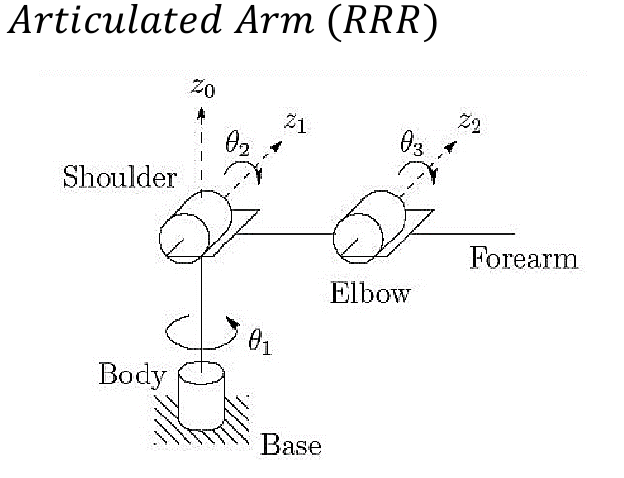

In [64]:
Image(filename='Images/ArticulatedArm.png')

now we define robot parameters:<br>
 $θ_1, θ_2, θ_3, a_1, a_2, a_3$

In [65]:
#creating python symbols 
theta_1 = sp.symbols("θ_1")
theta_2 = sp.symbols("θ_2")
theta_3 = sp.symbols("θ_3")
a_1 = sp.symbols("a_1")
a_2 = sp.symbols("a_2")
a_3 = sp.symbols("a_3")

In [66]:
#theta_1, theta_2, theta_3, a_1, a_2, a_3 = sp.symbols('θ_1 θ_2 θ_3 a_1 a_2 a_3' )

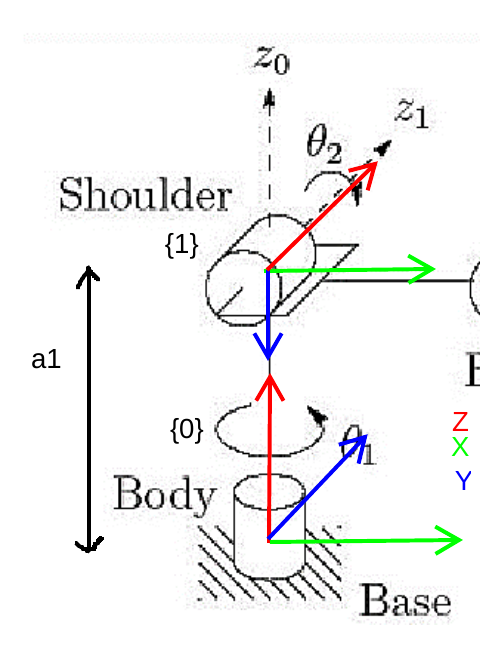

In [67]:
Image(filename='Images/AA0_1.png')

$R_z = \begin{bmatrix} Cθ_1 & -Sθ_1 & 0 \\ Sθ_1 & Cθ_1 & 0 \\ 0 & 0 & 1 \end{bmatrix}, \;\;R_1^0 = \begin{bmatrix} 1 & 0 & 0 \\ 0 & C(-90) & -S(-90) \\ 0 & S(-90) & C(-90)\end{bmatrix}, \;\;t_1^0 = \begin{bmatrix} 0 \\ 0 \\ a_1\end{bmatrix}$            

In [68]:
#Joint Rotation Matrix 
R_z_0 = get_R_z(theta = theta_1, joint_type ='r')
R_z_0

array([[cos(θ_1), -sin(θ_1), 0],
       [sin(θ_1), cos(θ_1), 0],
       [0, 0, 1]], dtype=object)

In [69]:
#Frame rotaion matrix
R_0_1 = get_R_frame(theta = -sp.pi/2, rotaion_axis = 0) 
R_0_1

array([[1, 0, 0],
       [0, 0, 1],
       [0, -1, 0]], dtype=object)

In [70]:
#Frame translation vector
t_0_1 = get_t(x_d = 0, y_d = 0, z_d = a_1)
t_0_1

array([[0],
       [0],
       [a_1]], dtype=object)

In [71]:
#homogenous transformation between frame{0} and frame{1}
T_0_1 = get_T(R_z_0, R_0_1, t_0_1)
T_0_1

array([[cos(θ_1), 0, -sin(θ_1), 0],
       [sin(θ_1), 0, cos(θ_1), 0],
       [0, -1, 0, a_1],
       [0, 0, 0, 1]], dtype=object)

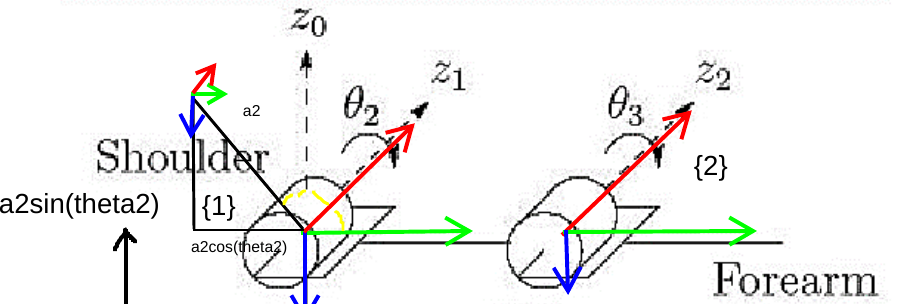

In [72]:
Image(filename='Images/AA1_2.png')

$R_z = \begin{bmatrix} Cθ_2 & -Sθ_2 & 0 \\ Sθ_2 & Cθ_2 & 0 \\ 0 & 0 & 1 \end{bmatrix}, \;\;R_2^1 = \begin{bmatrix} 1 & 0 & 0 \\ 0 & C(0) & -S(0) \\ 0 & S(0) & C(0)\end{bmatrix}, \;\;t_2^1 = \begin{bmatrix} a_2*Cθ_2 \\ -a_2*Sθ_2 \\ 0\end{bmatrix}$            

In [73]:
#Joint Rotation Matrix 
R_z_1 = get_R_z(theta = theta_2, joint_type ='r')
R_z_1

array([[cos(θ_2), -sin(θ_2), 0],
       [sin(θ_2), cos(θ_2), 0],
       [0, 0, 1]], dtype=object)

In [74]:
#Frame rotaion matrix
R_1_2 = get_R_frame(theta = 0, rotaion_axis = 0) 
R_1_2

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=object)

In [75]:
#Frame translation vector
t_1_2 = get_t(x_d = a_2*sp.cos(theta_2), y_d = -a_2*sp.sin(theta_2), z_d = 0)
t_1_2

array([[a_2*cos(θ_2)],
       [-a_2*sin(θ_2)],
       [0]], dtype=object)

In [76]:
#homogenous transformation between frame{1} and frame{2}
T_1_2 = get_T(R_z_1, R_1_2, t_1_2)
T_1_2

array([[cos(θ_2), -sin(θ_2), 0, a_2*cos(θ_2)],
       [sin(θ_2), cos(θ_2), 0, -a_2*sin(θ_2)],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=object)

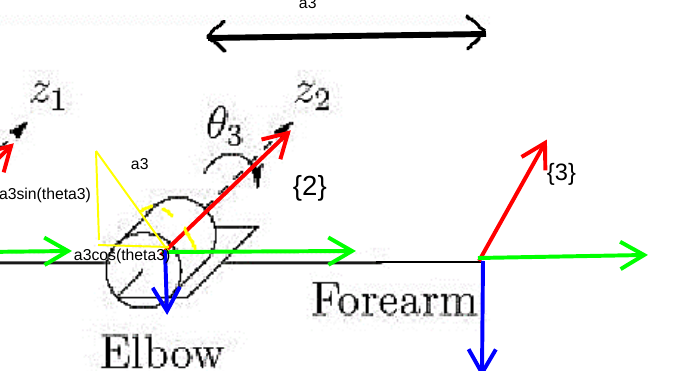

In [77]:
Image(filename='Images/AA2_3.png')

$R_z = \begin{bmatrix} Cθ_3 & -Sθ_3 & 0 \\ Sθ_3 & Cθ_3 & 0 \\ 0 & 0 & 1 \end{bmatrix}, \;\;R_3^2 = \begin{bmatrix} 1 & 0 & 0 \\ 0 & C(0) & -S(0) \\ 0 & S(0) & C(0)\end{bmatrix}, \;\;t_3^2 = \begin{bmatrix} a_3*Cθ_3 \\ -a_3*Sθ_3 \\ 0\end{bmatrix}$            

In [78]:
#Joint Rotation Matrix 
R_z_2 = get_R_z(theta = theta_3, joint_type ='r')
R_z_2

array([[cos(θ_3), -sin(θ_3), 0],
       [sin(θ_3), cos(θ_3), 0],
       [0, 0, 1]], dtype=object)

In [79]:
#Frame rotaion matrix
R_2_3 = get_R_frame(theta = 0, rotaion_axis = 0) 
R_2_3

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=object)

In [80]:
#Frame translation vector
t_2_3 = get_t(x_d = a_3*sp.cos(theta_3), y_d = -a_3*sp.sin(theta_3), z_d = 0)
t_2_3

array([[a_3*cos(θ_3)],
       [-a_3*sin(θ_3)],
       [0]], dtype=object)

In [81]:
#homogenous transformation between frame{2} and end effector
T_2_3 = get_T(R_z_2, R_2_3, t_2_3)
T_2_3

array([[cos(θ_3), -sin(θ_3), 0, a_3*cos(θ_3)],
       [sin(θ_3), cos(θ_3), 0, -a_3*sin(θ_3)],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=object)

### $\color{blue}{\text{Homogeneous Transformation Matrix from Frame 0 To End Effector :}}$

In [82]:
T_0_3 = get_T_total(T_0_1 , T_1_2, T_2_3)
T_0_3

array([[-sin(θ_2)*sin(θ_3)*cos(θ_1) + cos(θ_1)*cos(θ_2)*cos(θ_3),
        -sin(θ_2)*cos(θ_1)*cos(θ_3) - sin(θ_3)*cos(θ_1)*cos(θ_2),
        -sin(θ_1),
        a_2*cos(θ_1)*cos(θ_2) + a_3*sin(θ_2)*sin(θ_3)*cos(θ_1) + a_3*cos(θ_1)*cos(θ_2)*cos(θ_3)],
       [-sin(θ_1)*sin(θ_2)*sin(θ_3) + sin(θ_1)*cos(θ_2)*cos(θ_3),
        -sin(θ_1)*sin(θ_2)*cos(θ_3) - sin(θ_1)*sin(θ_3)*cos(θ_2),
        cos(θ_1),
        a_2*sin(θ_1)*cos(θ_2) + a_3*sin(θ_1)*sin(θ_2)*sin(θ_3) + a_3*sin(θ_1)*cos(θ_2)*cos(θ_3)],
       [-sin(θ_2)*cos(θ_3) - sin(θ_3)*cos(θ_2),
        sin(θ_2)*sin(θ_3) - cos(θ_2)*cos(θ_3), 0,
        a_1 + a_2*sin(θ_2) - a_3*sin(θ_2)*cos(θ_3) + a_3*sin(θ_3)*cos(θ_2)],
       [0, 0, 0, 1]], dtype=object)

In [83]:
pd.DataFrame(T_0_3)

,0,1,2,3
0,-sin(θ_2)*sin(θ_3)*cos(θ_1) + cos(θ_1)*cos(θ_2...,-sin(θ_2)*cos(θ_1)*cos(θ_3) - sin(θ_3)*cos(θ_1...,-sin(θ_1),a_2*cos(θ_1)*cos(θ_2) + a_3*sin(θ_2)*sin(θ_3)*...
1,-sin(θ_1)*sin(θ_2)*sin(θ_3) + sin(θ_1)*cos(θ_2...,-sin(θ_1)*sin(θ_2)*cos(θ_3) - sin(θ_1)*sin(θ_3...,cos(θ_1),a_2*sin(θ_1)*cos(θ_2) + a_3*sin(θ_1)*sin(θ_2)*...
2,-sin(θ_2)*cos(θ_3) - sin(θ_3)*cos(θ_2),sin(θ_2)*sin(θ_3) - cos(θ_2)*cos(θ_3),0,a_1 + a_2*sin(θ_2) - a_3*sin(θ_2)*cos(θ_3) + a...
3,0,0,0,1


## $\color{red}{\text{Example 1}}$

For the above articulated arm robot, given :
$θ_1 = 30^o,\;θ_2 = 60^o,\;θ_3=-90^o,\;a_1=0.2,\;a_2=0.3,\;a_3=0.3$<br>

Find the end effector final position using the derived forward kineamtics

#### Answer

In [84]:
#assigning values
theta_1 = np.pi/6
theta_2 = np.pi/3
theta_3 = -np.pi/2
a_1 = 0.2
a_2 = 0.3
a_3 = 0.3

In [85]:
############## 0-1
R_z_0 = get_R_z(theta = theta_1, joint_type ='r')
R_0_1 = get_R_frame(theta = -np.pi/2, rotaion_axis = 0)
t_0_1 = get_t(x_d = 0, y_d = 0, z_d = a_1)
T_0_1 = get_T(R_z_0, R_0_1, t_0_1)
############## 1-2
R_z_1 = get_R_z(theta = theta_2, joint_type ='r')
R_1_2 = get_R_frame(theta = 0, rotaion_axis = 0) 
t_1_2 = get_t(x_d = a_2*np.cos(theta_2), y_d = -a_2*np.sin(theta_2), z_d = 0)
T_1_2 = get_T(R_z_1, R_1_2, t_1_2)
############## 2-3
R_z_2 = get_R_z(theta = theta_3, joint_type ='r')
R_2_3 = get_R_frame(theta = 0, rotaion_axis = 0) 
t_2_3 = get_t(x_d = a_3*np.cos(theta_3), y_d = -a_3*np.sin(theta_3), z_d = 0)
T_2_3 = get_T(R_z_2, R_2_3, t_2_3)
############## 0-3
T_0_3 = get_T_total(T_0_1 , T_1_2, T_2_3)
##############
T_0_3 = pd.DataFrame(T_0_3)
T_0_3 


,0,1,2,3
0,0.750000000000000,0.433012701892219,-0.500000000000000,-0.0950961894323342
1,0.433012701892219,0.250000000000000,0.866025403784439,-0.0549038105676658
2,0.500000000000000,-0.866025403784439,6.12323399573677e-17,0.309807621135332
3,0,0,0,1.00000000000000


In [86]:
# End Effector position with respect to Base Frame
t_vector = T_0_3.iloc[0:3, 3]
t_vector.index = ['x','y','z']
t_vector

x    -0.0950961894323342
y    -0.0549038105676658
z      0.309807621135332
Name: 3, dtype: object

# $\color{green}{\text{Now we solve for the second robot :}}$ <br>

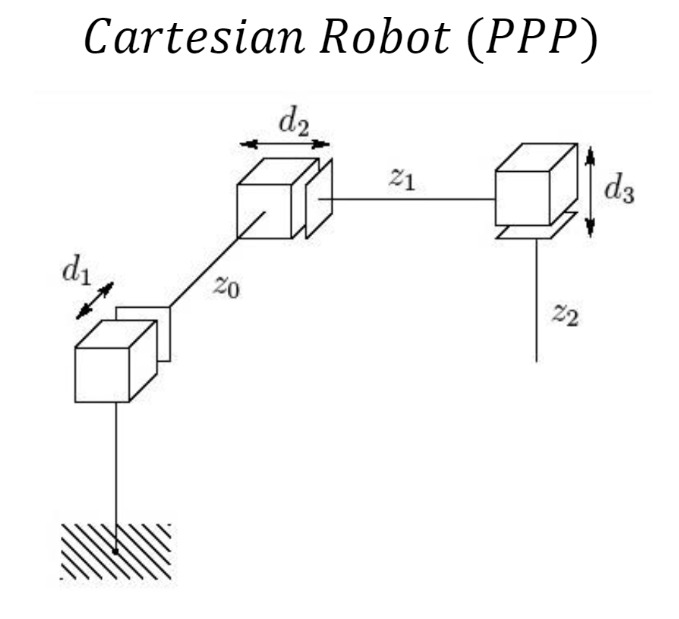

In [87]:
Image(filename='Images/CartesianRobotPPP.png')

now we define robot parameters:<br>
 $d1, d2, d3, a_0, a_1, a_2, a_3$

In [88]:
 #creating python symbols 
d_1 = sp.symbols("d_1")
d_2 = sp.symbols("d_2")
d_3 = sp.symbols("d_3")
a_0 = sp.symbols("a_0")
a_1 = sp.symbols("a_1")
a_2 = sp.symbols("a_2")
a_3 = sp.symbols("a_3")

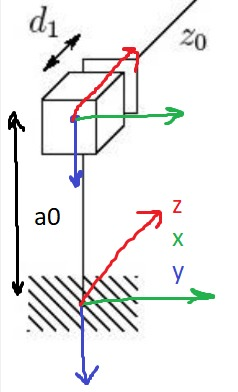

In [89]:
Image(filename='Images/C0_1.png')

$T_3^0 = \begin{bmatrix} -S(θ_2)*S(θ_3)*C(θ_1) + C(θ_1)*C(θ_2)*C(θ_3)&-S(θ_2)*C(θ_1)*C(θ_3) - S(θ_3)*C(θ_1)*C(θ_2)&-S(θ_1)&a_2*C(θ_1)*C(θ_2) + a_3*S(θ_2)*S(θ_3)*C(θ_1) + a_3*C(θ_1)*C(θ_2)*C(θ_3)\end{bmatrix}$

$R_z = \begin{bmatrix} 1&0&0 \\ 0&1&0 \\ 0 & 0 & 1 \end{bmatrix}, \;\;R_1^0 = \begin{bmatrix} 1 & 0 & 0 \\ 0 & C(0) & -S(0) \\ 0 & S(0) & C(0)\end{bmatrix}, \;\;t_1^0 = \begin{bmatrix} 0 \\ 0 \\ a_0\end{bmatrix}$            

In [90]:
#Joint Rotation Matrix 
R_z_0 = get_R_z(theta = _, joint_type ='p') #no rotation so we put joint 'p' to get desired matrix 
R_z_0

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [91]:
#Frame rotaion matrix
R_0_1 = get_R_frame(theta = 0, rotaion_axis = 0) 
R_0_1

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=object)

In [92]:
#Frame translation vector
t_0_1 = get_t(x_d = 0, y_d = 0, z_d = a_0)
t_0_1

array([[0],
       [0],
       [a_0]], dtype=object)

In [93]:
#homogenous transformation between frame{0} and frame{1}
T_0_1 = get_T(R_z_0, R_0_1, t_0_1)
T_0_1

array([[1.0, 0, 0, 0],
       [0.0, 1.00000000000000, 0, 0],
       [0.0, 0, 1.00000000000000, a_0],
       [0, 0, 0, 1]], dtype=object)

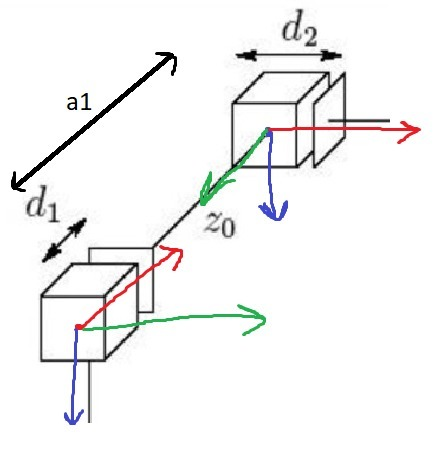

In [94]:
Image(filename='Images/C1_2.png')

$R_z = \begin{bmatrix} 1&0&0 \\ 0&1&0 \\ 0 & 0 & 1 \end{bmatrix}, \;\;R_2^1 = \begin{bmatrix} C(90) & 0 & S(90) \\ 0 & 1 & 0 \\ -S(90) & 0 & C(90)\end{bmatrix}, \;\;t_2^1 = \begin{bmatrix} 0 \\ 0 \\ a_1 + d_1\end{bmatrix}$            

In [95]:
#Joint Rotation Matrix 
R_z_1 = get_R_z(theta = _, joint_type ='p') 
R_z_1

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [96]:
#Frame rotaion matrix
R_1_2 = get_R_frame(theta = sp.pi/2, rotaion_axis = 1) 
R_1_2

array([[0, 0, 1],
       [0, 1, 0],
       [-1, 0, 0]], dtype=object)

In [97]:
#Frame translation vector
t_0_1 = get_t(x_d = 0, y_d = 0, z_d = a_1 + d_1)
t_0_1

array([[0],
       [0],
       [a_1 + d_1]], dtype=object)

In [98]:
#homogenous transformation between frame{0} and frame{1}
T_1_2 = get_T(R_z_1, R_1_2, t_0_1)
T_1_2

array([[0, 0.0, 1.00000000000000, 0],
       [0, 1.0, 0, 0],
       [-1.00000000000000, 0.0, 0, a_1 + d_1],
       [0, 0, 0, 1]], dtype=object)

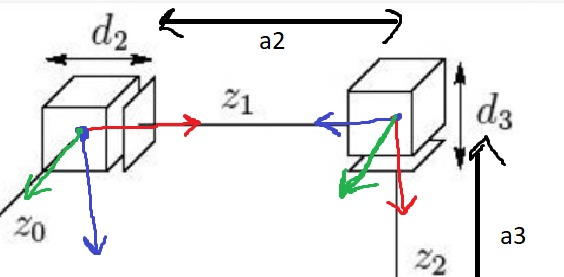

In [99]:
Image(filename='Images/C2_3.png')

$R_z = \begin{bmatrix} 1&0&0 \\ 0&1&0 \\ 0 & 0 & 1 \end{bmatrix}, \;\;R_3^2 = \begin{bmatrix} 1 & 0 & 0 \\ 0 & C(-90) & -S(-90) \\ 0 & S(-90) & C(-90)\end{bmatrix}, \;\;t_3^2 = \begin{bmatrix} 0 \\ 0 \\ a_2 + d_2\end{bmatrix}$            

In [100]:
#Joint Rotation Matrix 
R_z_2 = get_R_z(theta = _, joint_type ='p') 
R_z_2

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [101]:
#Frame rotaion matrix
R_2_3 = get_R_frame(theta = -sp.pi/2, rotaion_axis = 0) 
R_2_3

array([[1, 0, 0],
       [0, 0, 1],
       [0, -1, 0]], dtype=object)

In [102]:
#Frame translation vector
t_2_3 = get_t(x_d = 0, y_d = 0, z_d = a_2 + d_2)
t_2_3

array([[0],
       [0],
       [a_2 + d_2]], dtype=object)

In [103]:
#homogenous transformation between frame{0} and frame{1}
T_2_3 = get_T(R_z_2, R_2_3, t_2_3)
T_2_3

array([[1.0, 0, 0, 0],
       [0.0, 0, 1.00000000000000, 0],
       [0.0, -1.00000000000000, 0, a_2 + d_2],
       [0, 0, 0, 1]], dtype=object)

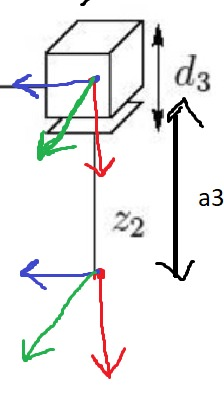

In [105]:
Image(filename='Images/C3_4.png')

In [106]:
#Joint Rotation Matrix 
R_z_0 = get_R_z(theta = theta_1, joint_type ='p') 
R_z_0
#Frame rotaion matrix
R_0_1 = get_R_frame(theta = 0, rotaion_axis = 0) 
R_0_1
#Frame translation vector
t_0_1 = get_t(x_d = 0, y_d = 0, z_d = a_1)
t_0_1
#homogenous transformation between frame{0} and frame{1}
T_0_1 = get_T(R_z_0, R_0_1, t_0_1)
T_0_1

array([[1.0, 0, 0, 0],
       [0.0, 1.00000000000000, 0, 0],
       [0.0, 0, 1.00000000000000, a_1],
       [0, 0, 0, 1]], dtype=object)

In [107]:
#Joint Rotation Matrix 
R_z_3 = get_R_z(theta = _, joint_type ='p') 
R_z_3

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [108]:
#Frame rotaion matrix
R_3_4 = get_R_frame(theta = 0, rotaion_axis = 0) 
R_3_4

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=object)

In [109]:
#Frame translation vector
t_3_4 = get_t(x_d = 0, y_d = 0, z_d = a_3 + d_3)
t_3_4

array([[0],
       [0],
       [a_3 + d_3]], dtype=object)

In [110]:
#homogenous transformation between frame{0} and frame{1}
T_3_4 = get_T(R_z_3, R_3_4, t_3_4)
T_3_4

array([[1.0, 0, 0, 0],
       [0.0, 1.00000000000000, 0, 0],
       [0.0, 0, 1.00000000000000, a_3 + d_3],
       [0, 0, 0, 1]], dtype=object)

### $\color{blue}{\text{Homogeneous Transformation Matrix from Frame 0 To End Effector :}}$

In [111]:
T_0_4 = get_T_total(T_0_1 , T_1_2, T_2_3, T_3_4)
T_0_4

array([[0, -1.00000000000000, 0, 1.0*a_2 + 1.0*d_2],
       [0, 0, 1.00000000000000, 1.0*a_3 + 1.0*d_3],
       [-1.00000000000000, 0, 0, 2.0*a_1 + 1.0*d_1],
       [0, 0, 0, 1]], dtype=object)

In [112]:
pd.DataFrame(T_0_4)

,0,1,2,3
0,0,-1.00000000000000,0,1.0*a_2 + 1.0*d_2
1,0,0,1.00000000000000,1.0*a_3 + 1.0*d_3
2,-1.00000000000000,0,0,2.0*a_1 + 1.0*d_1
3,0,0,0,1


## $\color{red}{\text{Example 2}}$

For the above cartesian robot, given :
$d_1 = 0.1,\;d_2 = 0.2,\;d_3 = 0.1,\;a_0 = 0.3\;a_1=0.2,\;a_2=0.3,\;a_3=0.1$<br>

Find the end effector final position using the derived forward kineamtics

#### Answer

In [126]:
#assigning values
d_1 = 0.1
d_2 = 0.2
d_3 = 0.1
a_0 = 0.3
a_1 = 0.2
a_2 = 0.3
a_3 = 0.1

In [ ]:
############## 0-1
R_z_0 = get_R_z(theta = _, joint_type ='p')
R_0_1 = get_R_frame(theta = 0, rotaion_axis = 0)
t_0_1 = get_t(x_d = 0, y_d = 0, z_d = a_0)
T_0_1 = get_T(R_z_0, R_0_1, t_0_1)
############## 1-2
R_z_1 = get_R_z(theta = _, joint_type ='p')
R_1_2 = get_R_frame(theta = np.pi/2, rotaion_axis = 1) 
t_1_2 = get_t(x_d = 0, y_d = 0, z_d = (a_1 + d_1))
T_1_2 = get_T(R_z_1, R_1_2, t_1_2)
############## 2-3
R_z_2 = get_R_z(theta = _, joint_type ='p')
R_2_3 = get_R_frame(theta = -np.pi/2, rotaion_axis = 0) 
t_2_3 = get_t(x_d = 0, y_d = 0, z_d = (a_2 + d_2))
T_2_3 = get_T(R_z_2, R_2_3, t_2_3)
############## 3-4
R_z_3 = get_R_z(theta = _, joint_type ='p')
R_3_4 = get_R_frame(theta = 0, rotaion_axis = 0) 
t_3_4 = get_t(x_d = 0, y_d = 0, z_d = (a_3 + d_3))
T_3_4 = get_T(R_z_3, R_3_4, t_3_4)
############## 0-3
T_0_3 = get_T_total(T_0_1 , T_1_2, T_2_3, T_3_4)
##############
import pandas as pd
T_0_4 = pd.DataFrame(T_0_4)
T_0_4 


: 

In [131]:
# End Effector position with respect to Base Frame
t_vector = T_0_4.iloc[0:3, 3]
t_vector.index = ['x','y','z']
t_vector

x    1.0*a_2 + 1.0*d_2
y    1.0*a_3 + 1.0*d_3
z    2.0*a_1 + 1.0*d_1
Name: 3, dtype: object